In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ratings data
ratings = pd.read_csv('raw_ratings.csv', delimiter=';', parse_dates=['timestamp'], date_parser=lambda x: pd.to_datetime(int(x), unit='s'))

# # Load the movies data
movies = pd.read_csv('raw_movies.csv', delimiter=';')

# # Merge the data
data = pd.merge(ratings, movies, on='iid')

# # Set timestamp as index
data.set_index('timestamp', inplace=True)

# # List of all genres
genres = ['Adventure', 'Fantasy', 'Children', 'Animation', 'Comedy', 'Romance', 'Drama', 'Thriller', 'Action', 'Crime', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


/tmp/ipykernel_180508/840430472.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ratings = pd.read_csv('raw_ratings.csv', delimiter=';', parse_dates=['timestamp'], date_parser=lambda x: pd.to_datetime(int(x), unit='s'))


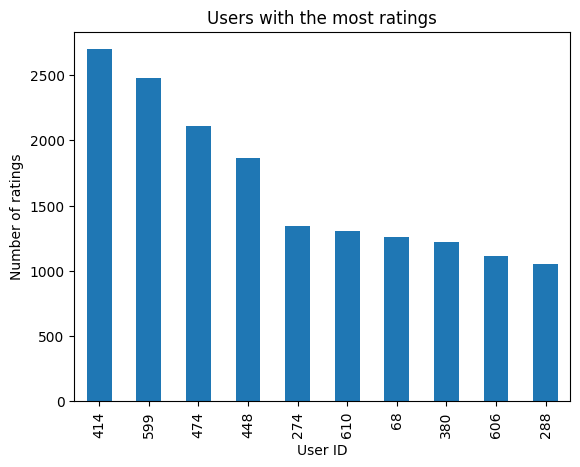

In [49]:
# find the users who have rated the most movies
user_counts = data['uid'].value_counts()
user_counts = user_counts.sort_values(ascending=False)
user_counts = user_counts[:10]
user_counts.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of ratings')
plt.title('Users with the most ratings')
plt.show()

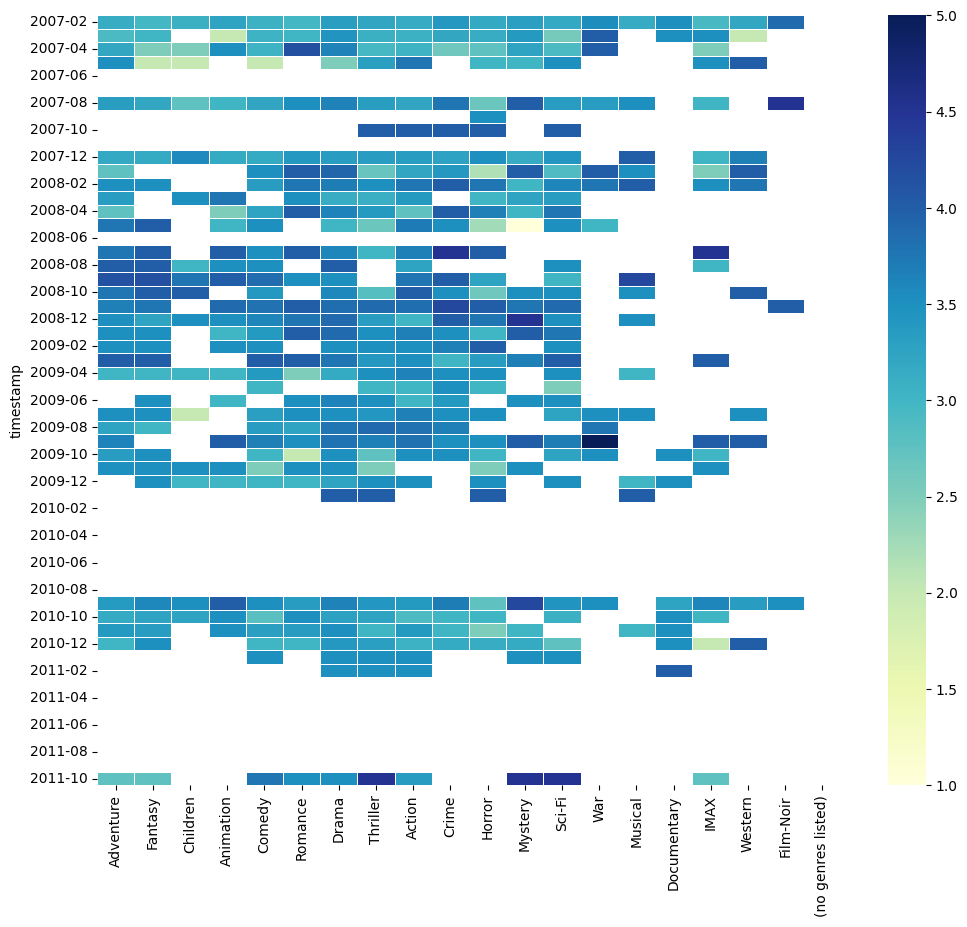

In [56]:
import seaborn as sns

# Create an empty DataFrame for storing average ratings per year for each genre
heatmap_data = pd.DataFrame()

# Iterate over the genres
for genre in genres:
    # Filter data by genre
    genre_data = data[data[genre] == True]

    # Filter by user
    user = 274
    if user:
        genre_data = genre_data[genre_data['uid'] == user]

    genre_data = genre_data['rating']

    # Group data by year and calculate average rating
    yearly_avg = genre_data.resample('M').mean()

    # Convert the timestamps to month + year string format
    yearly_avg.index = yearly_avg.index.strftime('%Y-%m')

    # Store the results in the DataFrame
    heatmap_data[genre] = yearly_avg

# Transpose the DataFrame so that genres are rows and years are columns
# heatmap_data = heatmap_data.transpose()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)

plt.show()